## graph creation notebook

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import glob
import os

import networkx as nx
import fiona
import geopandas as gpd
from shapely.geometry import Point, Polygon, shape
from shapely.geometry.multilinestring import MultiLineString
from shapely.geometry.linestring import LineString
from shapely.geometry.collection import  GeometryCollection 
from descartes.patch import PolygonPatch
import pandas as pd
import numpy as np

# some custom files
from img_helpers import get_all_images_in_folder, return_polygons
from helper_functions import getpolygons, make_single_string_object,drop_columns_and_add_one,check_order

# to display images inline
get_ipython().magic(u'matplotlib inline')



## some setup for directories paths etc

In [2]:
folder_polygons = 'D:/allegoria/topo_ortho/ING_processed_margo/moselle/'
# load csv of the images saved previously part
excelPaths = sorted(glob.glob(folder_polygons +'*/*.csv'))
csv_poly = getpolygons(excelPaths)
imagePaths = sorted(glob.glob(folder_polygons +'*/*img.png'))
check_order(imagePaths, excelPaths)
print("Saved csv polygons are loaded correctly there %d ."%(len(csv_poly)))


Check the folder correspondence! Error in the check order funtion
Saved csv polygons are loaded correctly there 6000 .


In [3]:
global_path = "D:/allegoria/datasets_alegoria/BD/BD_topo/moselle/BDTOPO_3-0_TOUSTHEMES_SHP_LAMB93_D057_2019-03-19/BDTOPO/1_DONNEES_LIVRAISON_2019-03-00260/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/"
#global_path = "D:/allegoria/datasets_alegoria/BD/2004/old_data_moselle/BDTOPO/1_DONNEES_LIVRAISON_2019-06-00227/"

## roads

In [4]:
# load all the shapely files related to ROADS
fp_road = global_path + "TRANSPORT/ROUTE_NUMEROTEE_OU_NOMMEE.shp"
fp_road_troncon = global_path + "TRANSPORT/TRONCON_DE_ROUTE.shp"
# Read file using gpd.read_file()
data_road = gpd.read_file(fp_road)
data_road_troncon =  gpd.read_file(fp_road_troncon)
frames = [data_road, data_road_troncon]
# make a single table with all the roads, not just a signle type
all_roads=  pd.concat(frames,ignore_index=True) 


# # load all the shapely files related to ROADS
# fp_road = global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/A_RESEAU_ROUTIER/ROUTE.shp"
# fp_nmrd =  global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/A_RESEAU_ROUTIER/ROUTE_NOMMEE.shp"
# fp_prrd=  global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/A_RESEAU_ROUTIER/ROUTE_PRIMAIRE.shp"
# fp_scrd = global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/A_RESEAU_ROUTIER/ROUTE_SECONDAIRE.shp"
# # Read file using gpd.read_file()
# data_road = gpd.read_file(fp_road)
# data_nmrd =  gpd.read_file(fp_nmrd)
# data_prrd = gpd.read_file(fp_prrd)
# data_scrd = gpd.read_file(fp_scrd)
# # make a single table with all the roads, not just a signle type
# all_roads=  pd.concat([data_road, data_nmrd, data_prrd, data_scrd],ignore_index=True ) 

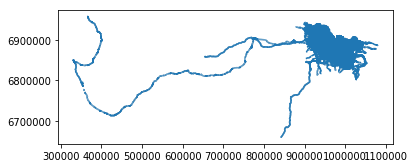

In [5]:
all_roads.plot()

## rivers

NameError: name 'data_water' is not defined

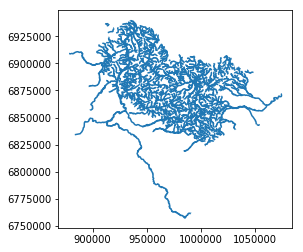

In [6]:
fp_water =  global_path + "HYDROGRAPHIE/COURS_D_EAU.shp"
all_water = gpd.read_file(fp_water)
# make a single table with all the roads, not just a signle type
all_water.plot()
len(all_water)

# fp_cours =  global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/D_HYDROGRAPHIE/TRONCON_COURS_EAU.shp"
# data_water = gpd.read_file(fp_cours)
# # make a single table with all the roads, not just a signle type
# all_water = data_water
# all_water.plot()
# len(all_water)
# data_water.crs

## Main loop to save sub-shape files for each image
I go through the images and save the vector data inside their boundaries as shape files

In [62]:
import math
def remove_dublicates(list_of_points, threshold = 5):
    #for all points find the closest ones
    ''' remove the pair of points if the dist between them is less than a threshold'''
    filtered_list = list_of_points.copy()
    indexes_to_delete = []
    for i in range(len(list_of_points)-1):
        point1 = list_of_points[i][1] # end of the line
        for j in range(i, len(list_of_points)):
            point2 = list_of_points[j][0] # begining of the line
            dist_eucl = (math.sqrt((point1[0]-point2[0]) ** 2 + (point1[1]-point2[1]) ** 2 ))
        # now add the point to the new list only if there is no element closer than the threshold
            if dist_eucl < threshold:
            # merge the line in one
                filtered_list[i][1] = filtered_list[j][1] # end of first list is now the end of the second
                indexes_to_delete.append(list_of_points[j])
   
    for el in indexes_to_delete:
        try:
            filtered_list.remove(el)
        except ValueError:
            continue
    return filtered_list
        

In [151]:
def filter_graph(g, threshold = 5):    
    """ remove all nearly dublicates from a graph nodes"""
    g_copy = g.copy()
    nodes = list(g.nodes)
    nodes_to_filter = []
    for i in range(len(nodes)-1):
        n1 = nodes[i]
        for j in range(i+1, len(nodes)):
            n2 = nodes[j]
            if (math.sqrt((n1[0]-n2[0]) ** 2 + (n1[1]-n2[1]) ** 2 )) < threshold:                
                nodes_to_filter.append(n2)
      
    for node in nodes_to_filter:
        try: 
            g_copy.remove_node(node)
        except:
            continue
    return g_copy 
     
        

In [152]:
g = filter_graph(G)

915787.7 6890416.4 915958.2 6890216.7
262.5839675229133
915787.7 6890416.4 915613.3 6890774.3
398.1303429777333
915787.7 6890416.4 915408.2 6890302.3
396.2815413315734
915787.7 6890416.4 915567.0 6890004.4
467.38901356362607
915787.7 6890416.4 915301.1 6890794.1
615.9844559722384
915787.7 6890416.4 915291.4 6890876.4
676.693202271111
915787.7 6890416.4 915613.3 6890774.3
398.1303429777333
915787.7 6890416.4 915787.7 6890416.4
0.0
915787.7 6890416.4 915958.2 6890216.7
262.5839675229133
915787.7 6890416.4 915314.0 6890945.0
709.795498717456
915787.7 6890416.4 915314.0 6890945.0
709.795498717456
915787.7 6890416.4 915291.4 6890880.8
679.691878721095
915787.7 6890416.4 915567.0 6890004.4
467.38901356362607
915787.7 6890416.4 915408.2 6890302.3
396.2815413315734
915787.7 6890416.4 915349.7 6890476.1
442.0498727518322
915787.7 6890416.4 915464.8 6890206.7
385.0175320683696
915787.7 6890416.4 915464.8 6890206.7
385.0175320683696
915787.7 6890416.4 915225.2 6890061.1
665.3152185246701
915787.7

In [148]:
print(len(G.nodes))

24


In [153]:
print(len(g.nodes))

11


In [53]:
list_of_points =[[(915787.7, 6890416.4), (915958.2, 6890216.7), 0], [(915613.3, 6890774.3), (916094.2, 6890992.0), 0], [(914972.0, 6891293.2), (915314.0, 6890945.0), 0], [(915613.3, 6890774.3), (915787.7, 6890416.4), 0], [(915314.0, 6890945.0), (915481.5, 6891105.9), 0], [(915291.4, 6890876.4), (915291.4, 6890880.8), 0], [(915291.4, 6890880.8), (915314.0, 6890945.0), 0], [(915408.2, 6890302.3), (915343.2, 6889987.4), 0], [(915225.2, 6890061.1), (915062.3, 6889938.8), 0], [(915567.0, 6890004.4), (915958.2, 6890216.7), 0], [(915408.2, 6890302.3), (915349.7, 6890476.1), 0], [(915567.0, 6890004.4), (915851.5, 6889772.6), 0], [(915408.2, 6890302.3), (915464.8, 6890206.7), 0], [(915464.8, 6890206.7), (915787.7, 6890416.4), 0], [(915464.8, 6890206.7), (915567.0, 6890004.4), 0], [(915343.2, 6889987.4), (915567.0, 6890004.4), 0], [(915225.2, 6890061.1), (915343.2, 6889987.4), 0], [(915301.1, 6890794.1), (915291.4, 6890876.4), 0], [(915349.7, 6890476.1), (915301.1, 6890794.1), 0], [(915301.1, 6890794.1), (914590.7, 6890332.8), 0], [(915349.7, 6890476.1), (914908.9, 6890207.2), 0], [(914908.9, 6890207.2), (915225.2, 6890061.1), 0], [(915481.5, 6891105.9), (915613.3, 6890774.3), 0], [(917266.6, 6892527.2), (923310.2, 6885108.9), 1], [(915613.3, 6890774.3, 281.1), (915787.7, 6890416.4), 0], [(915787.7, 6890416.4, 291.0), (915787.7, 6890416.4), 0], [(915787.7, 6890416.4, 291.0), (915787.7, 6890416.4), 0], [(915958.2, 6890216.7, 298.4), (915787.7, 6890416.4), 0], [(915613.3, 6890774.3, 281.1), (915613.3, 6890774.3), 0], [(915787.7, 6890416.4, 291.0), (915613.3, 6890774.3), 0], [(915613.3, 6890774.3, 281.1), (915613.3, 6890774.3), 0], [(916094.2, 6890992.0, 273.9), (915613.3, 6890774.3), 0], [(915314.0, 6890945.0, 266.6), (915314.0, 6890945.0), 0], [(915481.5, 6891105.9, 272.5), (915314.0, 6890945.0), 0], [(914972.0, 6891293.2, 285.7), (915314.0, 6890945.0), 0], [(915314.0, 6890945.0, 266.6), (915314.0, 6890945.0), 0], [(915291.4, 6890880.8, 266.0), (915314.0, 6890945.0), 0], [(915314.0, 6890945.0, 266.6), (915314.0, 6890945.0), 0], [(914972.0, 6891293.2, 285.7), (915314.0, 6890945.0), 0], [(915314.0, 6890945.0, 266.6), (915314.0, 6890945.0), 0], [(915291.4, 6890880.8, 266.0), (915314.0, 6890945.0), 0], [(915314.0, 6890945.0, 266.6), (915314.0, 6890945.0), 0], [(915314.0, 6890945.0, 266.6), (915314.0, 6890945.0), 0], [(915481.5, 6891105.9, 272.5), (915314.0, 6890945.0), 0], [(915567.0, 6890004.4, 296.9), (915958.2, 6890216.7), 0], [(915958.2, 6890216.7, 298.4), (915958.2, 6890216.7), 0], [(915958.2, 6890216.7, 298.4), (915958.2, 6890216.7), 0], [(916065.3, 6890093.2, 299.1), (915958.2, 6890216.7), 0], [(915567.0, 6890004.4, 296.9), (915958.2, 6890216.7), 0], [(915958.2, 6890216.7, 298.4), (915958.2, 6890216.7), 0], [(915787.7, 6890416.4, 291.0), (915958.2, 6890216.7), 0], [(915958.2, 6890216.7, 298.4), (915958.2, 6890216.7), 0], [(915408.2, 6890302.3, 293.7), (915408.2, 6890302.3), 0], [(915349.7, 6890476.1, 288.9), (915408.2, 6890302.3), 0], [(915408.2, 6890302.3, 293.7), (915408.2, 6890302.3), 0], [(915343.2, 6889987.4, 292.1), (915408.2, 6890302.3), 0], [(915567.0, 6890004.4, 296.9), (915567.0, 6890004.4), 0], [(915851.5, 6889772.6, 293.3), (915567.0, 6890004.4), 0], [(915567.0, 6890004.4, 296.9), (915567.0, 6890004.4), 0], [(915958.2, 6890216.7, 298.4), (915567.0, 6890004.4), 0], [(915408.2, 6890302.3, 293.7), (915408.2, 6890302.3), 0], [(915464.8, 6890206.7, 292.3), (915408.2, 6890302.3), 0], [(915408.2, 6890302.3, 293.7), (915408.2, 6890302.3), 0], [(915343.2, 6889987.4, 292.1), (915408.2, 6890302.3), 0], [(915408.2, 6890302.3, 293.7), (915408.2, 6890302.3), 0], [(915464.8, 6890206.7, 292.3), (915408.2, 6890302.3), 0], [(915408.2, 6890302.3, 293.7), (915408.2, 6890302.3), 0], [(915349.7, 6890476.1, 288.9), (915408.2, 6890302.3), 0], [(915464.8, 6890206.7, 292.3), (915787.7, 6890416.4), 0], [(915787.7, 6890416.4, 291.0), (915787.7, 6890416.4), 0], [(915787.7, 6890416.4, 291.0), (915787.7, 6890416.4), 0], [(915958.2, 6890216.7, 298.4), (915787.7, 6890416.4), 0], [(915464.8, 6890206.7, 292.3), (915787.7, 6890416.4), 0], [(915787.7, 6890416.4, 291.0), (915787.7, 6890416.4), 0], [(915613.3, 6890774.3, 281.1), (915787.7, 6890416.4), 0], [(915787.7, 6890416.4, 291.0), (915787.7, 6890416.4), 0], [(915464.8, 6890206.7, 292.3), (915567.0, 6890004.4), 0], [(915567.0, 6890004.4, 296.9), (915567.0, 6890004.4), 0], [(915567.0, 6890004.4, 296.9), (915567.0, 6890004.4), 0], [(915958.2, 6890216.7, 298.4), (915567.0, 6890004.4), 0], [(915464.8, 6890206.7, 292.3), (915567.0, 6890004.4), 0], [(915567.0, 6890004.4, 296.9), (915567.0, 6890004.4), 0], [(915567.0, 6890004.4, 296.9), (915567.0, 6890004.4), 0], [(915851.5, 6889772.6, 293.3), (915567.0, 6890004.4), 0], [(915464.8, 6890206.7, 292.3), (915464.8, 6890206.7), 0], [(915567.0, 6890004.4, 296.9), (915464.8, 6890206.7), 0], [(915408.2, 6890302.3, 293.7), (915464.8, 6890206.7), 0], [(915464.8, 6890206.7, 292.3), (915464.8, 6890206.7), 0], [(915343.2, 6889987.4, 292.1), (915343.2, 6889987.4), 0], [(915567.0, 6890004.4, 296.9), (915343.2, 6889987.4), 0], [(915408.2, 6890302.3, 293.7), (915343.2, 6889987.4), 0], [(915343.2, 6889987.4, 292.1), (915343.2, 6889987.4), 0], [(915343.2, 6889987.4, 292.1), (915567.0, 6890004.4), 0], [(915567.0, 6890004.4, 296.9), (915567.0, 6890004.4), 0], [(915567.0, 6890004.4, 296.9), (915567.0, 6890004.4), 0], [(915958.2, 6890216.7, 298.4), (915567.0, 6890004.4), 0], [(915343.2, 6889987.4, 292.1), (915567.0, 6890004.4), 0], [(915567.0, 6890004.4, 296.9), (915567.0, 6890004.4), 0], [(915567.0, 6890004.4, 296.9), (915567.0, 6890004.4), 0], [(915851.5, 6889772.6, 293.3), (915567.0, 6890004.4), 0], [(915225.2, 6890061.1, 283.5), (915343.2, 6889987.4), 0], [(915343.2, 6889987.4, 292.1), (915343.2, 6889987.4), 0], [(915408.2, 6890302.3, 293.7), (915343.2, 6889987.4), 0], [(915343.2, 6889987.4, 292.1), (915343.2, 6889987.4), 0], [(915225.2, 6890061.1, 283.5), (915225.2, 6890061.1), 0], [(915343.2, 6889987.4, 292.1), (915225.2, 6890061.1), 0], [(915225.2, 6890061.1, 283.5), (915225.2, 6890061.1), 0], [(915062.3, 6889938.8, 279.6), (915225.2, 6890061.1), 0], [(915301.1, 6890794.1, 269.2), (915291.4, 6890876.4), 0], [(915291.4, 6890876.4, 266.0), (915291.4, 6890876.4), 0], [(915291.4, 6890876.4, 266.0), (915291.4, 6890876.4), 0], [(915291.4, 6890880.8, 266.0), (915291.4, 6890876.4), 0], [(915349.7, 6890476.1, 288.9), (915349.7, 6890476.1), 0], [(915301.1, 6890794.1, 269.2), (915349.7, 6890476.1), 0], [(915408.2, 6890302.3, 293.7), (915349.7, 6890476.1), 0], [(915349.7, 6890476.1, 288.9), (915349.7, 6890476.1), 0], [(915301.1, 6890794.1, 269.2), (915301.1, 6890794.1), 0], [(914590.7, 6890332.8, 271.3), (915301.1, 6890794.1), 0], [(915301.1, 6890794.1, 269.2), (915301.1, 6890794.1), 0], [(915291.4, 6890876.4, 266.0), (915301.1, 6890794.1), 0], [(915349.7, 6890476.1, 288.9), (915349.7, 6890476.1), 0], [(914908.9, 6890207.2, 288.4), (915349.7, 6890476.1), 0], [(915408.2, 6890302.3, 293.7), (915349.7, 6890476.1), 0], [(915349.7, 6890476.1, 288.9), (915349.7, 6890476.1), 0], [(915349.7, 6890476.1, 288.9), (915349.7, 6890476.1), 0], [(914908.9, 6890207.2, 288.4), (915349.7, 6890476.1), 0], [(915349.7, 6890476.1, 288.9), (915349.7, 6890476.1), 0], [(915301.1, 6890794.1, 269.2), (915349.7, 6890476.1), 0], [(914908.9, 6890207.2, 288.4), (915225.2, 6890061.1), 0], [(915225.2, 6890061.1, 283.5), (915225.2, 6890061.1), 0], [(915225.2, 6890061.1, 283.5), (915225.2, 6890061.1), 0], [(915062.3, 6889938.8, 279.6), (915225.2, 6890061.1), 0], [(914908.9, 6890207.2, 288.4), (915225.2, 6890061.1), 0], [(915225.2, 6890061.1, 283.5), (915225.2, 6890061.1), 0], [(915225.2, 6890061.1, 283.5), (915225.2, 6890061.1), 0], [(915343.2, 6889987.4, 292.1), (915225.2, 6890061.1), 0], [(915481.5, 6891105.9, 272.5), (915613.3, 6890774.3), 0], [(915613.3, 6890774.3, 281.1), (915613.3, 6890774.3), 0], [(915613.3, 6890774.3, 281.1), (915613.3, 6890774.3), 0], [(916094.2, 6890992.0, 273.9), (915613.3, 6890774.3), 0], [(915481.5, 6891105.9, 272.5), (915613.3, 6890774.3), 0], [(915613.3, 6890774.3, 281.1), (915613.3, 6890774.3), 0], [(915613.3, 6890774.3, 281.1), (915613.3, 6890774.3), 0], [(915787.7, 6890416.4, 291.0), (915613.3, 6890774.3), 0], [(915481.5, 6891105.9, 272.5), (915481.5, 6891105.9), 0], [(915613.3, 6890774.3, 281.1), (915481.5, 6891105.9), 0], [(915314.0, 6890945.0, 266.6), (915481.5, 6891105.9), 0], [(915481.5, 6891105.9, 272.5), (915481.5, 6891105.9), 0], [(917266.6, 6892527.2), (915291.3, 6890879.4), 1], [(923310.2, 6885108.9), (915291.3, 6890879.4), 1], [(915291.4, 6890876.4, 266.0), (915291.3, 6890879.4), 0], [(915291.4, 6890880.8, 266.0), (915291.3, 6890879.4), 0]]

In [56]:
list_of_points_clean = remove_dublicates(list_of_points)

In [57]:
len(list_of_points_clean)

78

In [58]:
len(list_of_points)

152

In [68]:
#first dome setup
def add_important_points(line1, line2, list_of_important_points, coordinates, gp_frame, shp, shp2):
    '''function ads important points from line interestections. Also, it handles different cases when line interestion is:
    a line, a line and a point, multi-lline etc'''
    #check geo type
    if isinstance(coordinates, MultiLineString) or isinstance(coordinates, LineString):
        pass
    # I ignore the lines                       
    elif isinstance(coordinates, GeometryCollection):
        # case when it is a collection of lines and points
        num_crossings = len(coordinates)
        for i in range(len(coordinates)):
            #recursively call the same function
            list_of_important_points = add_important_points(line1, line2, list_of_important_points, coordinates[i], gp_frame,shp, shp2)
    elif isinstance(coordinates,Point):
            list_of_important_points.append([line1.coords[0],(coordinates.x,coordinates.y),gp_frame['Nature'].iloc[shp]]) #start, end, nature
            list_of_important_points.append([line1.coords[-1],(coordinates.x,coordinates.y),gp_frame['Nature'].iloc[shp]]) #start, end, nature
            list_of_important_points.append([line2.coords[0],(coordinates.x,coordinates.y),gp_frame['Nature'].iloc[shp2]]) #start, end, nature
            list_of_important_points.append([line2.coords[-1],(coordinates.x,coordinates.y),gp_frame['Nature'].iloc[shp2]]) #start, end, nature
    else:
        #case when it is maybe smth weird, or a collection of points only
        try:
            num_crossings = len(coordinates)
            for c in range(num_crossings):
                #then we have c  new edges - two crossed lines are divided into 4 parts
                list_of_important_points.append([line1.coords[0],(coordinates[c].x,coordinates[c].y),gp_frame['Nature'].iloc[shp]]) #start, end, nature
                list_of_important_points.append([line1.coords[-1],(coordinates[c].x,coordinates[c].y),gp_frame['Nature'].iloc[shp]]) #start, end, nature
                list_of_important_points.append([line2.coords[0],(coordinates[c].x,coordinates[c].y),gp_frame['Nature'].iloc[shp2]]) #start, end, nature
                list_of_important_points.append([line2.coords[-1],(coordinates[c].x,coordinates[c].y),gp_frame['Nature'].iloc[shp2]]) #start, end, nature
        except:
            print('No type of the intersection is understood, ignoring this data type ', type(coordinates))
    return list_of_important_points

        

# function to create a graph from pandas dataframe
from shapely.geometry.multilinestring import MultiLineString
def create_graph(gp_frame, poly = None):
    ''' function takes the pandas frame and creates the graph, where the nodes are the begining of the lines or
    crossiing points and links are the roads/rivers, the edges also have their nature information.
    Since sometimes the points can be outside of the polygon, one can also pass a polygon, so all the nodes outside of it 
    will be deleted:
    gp_frame = pandas dataframe with geometry column (supports geometry string)
    poly - polygon, all points outside of its coordinates will be deleted
    returns:
    Graph G, where are nodes are points, edges are types of element (nature=road 0 or water 1)
    Protocol: 
    1) Find start and end points of the lines
    2) Split lines at the intersections
    3) Create nodes at the start and end point of each split line and intersection points
    4) check with a polygon if the nodes are within the image borders. Remove if not.

    '''
    net = nx.Graph() # empty graph
    list_of_important_points = [] #empty list where I have the beginings of the line and the endings (start/end point) and crossing points
    #start + end points
    for shp in range(1, len(gp_frame)):
        # the geometry property here may be specific to my shapefile
        line = gp_frame['geometry'].iloc[shp] #get the line
        try:
            list_of_important_points.append([line.coords[0][:2],line.coords[-1][:2], gp_frame['Nature'].iloc[shp]]) #start (x,y), end, nature
        except:
            print('Not a line object encountered')
    # remove near identical points here -> remove all the points which are really close to each other
    list_of_important_points = remove_dublicates(list_of_important_points)
            
    # points crossings
    for shp in range(1, len(gp_frame)):
    # the geometry property here may be specific to my shapefile
        line1 = gp_frame['geometry'].iloc[shp] #get the line
        for shp2 in range(0, shp-1):
            line2 = gp_frame['geometry'].iloc[shp2] #get the second line
            if line1.intersects(line2):
                coordinates = line1.intersection(line2)
                #check what is the type of interection and add points accordingly
                list_of_important_points = add_important_points(line1, line2, list_of_important_points, coordinates, gp_frame, shp, shp2)

                
    
    # not create a graph from an edgelist
    for edge in list_of_important_points:
        if poly is not None:
            if poly.contains(Point(edge[0])) and poly.contains(Point(edge[1])):
                net.add_edge(edge[0], edge[1],  nature = edge[2]) #add edge with weight, where weight is the nature
            else:
                continue
            
        else:
            net.add_edge(edge[0], edge[1],  nature = edge[2]) #add edge with weight, where weight is the nature
    return net


In [119]:
#graph_dict = {}
for i, poly in enumerate(csv_poly):
    name  = imagePaths[i][:-7] + 'vector.gpickle'
    print(name)
    sg_roads = all_roads[all_roads.geometry.intersects(poly)]  # extract segments of roads
    sg_water = all_water[all_water.geometry.intersects(poly)]  # extract segments of water
    sg_single_roads = make_single_string_object(sg_roads, poly) # remove multistrings
    sg_single_water = make_single_string_object(sg_water, poly)
    sg_single_roads = drop_columns_and_add_one(sg_single_roads, 'roads', year=2019) # remove extra columns
    sg_single_water = drop_columns_and_add_one(sg_single_water, 'water', year = 2019)
    combined_pd = sg_single_roads.append(sg_single_water, ignore_index= True) # in this stage I am ready to save all the sub-images
    if combined_pd.empty:
         G = nx.empty_graph()
    else:
        G = create_graph(gp_frame=combined_pd, poly=poly)
        # filter graph to remove nearly dublicates
        #G = filter_graph(G)
        #graph_dict[name] = G 
    #nx.write_gpickle(G, name, protocol=4)
    break

D:/allegoria/topo_ortho/ING_processed_margo/moselle\57-2015-0915-6895-LA93-0M50-E080\0000_vector.gpickle


In [70]:
# some verifications about the graph data type
len(G.nodes)

24

In [20]:
M = nx.read_gpickle(name)

## Segment -> Graph -> Visualization
This part of the notebook plots my graphs and vector files to show that the graph was made correctly

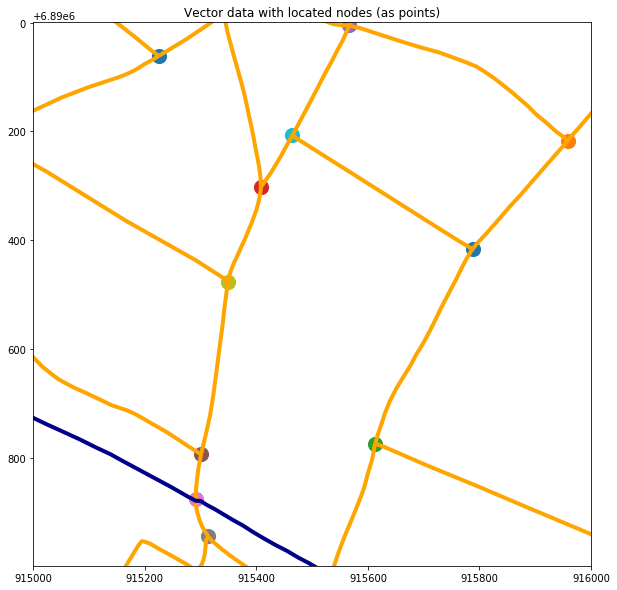

In [156]:
# check if the nodes are correctly extracted
for poly in csv_poly[0:1]:    
    sg_roads = all_roads[all_roads.geometry.intersects(poly)]  # extract segments of roads
    sg_water = all_water[all_water.geometry.intersects(poly)]  # extract segments of water
    fig, ax = plt.subplots(figsize=(10.0, 10.0))
    if not  sg_roads.empty:
        sg_roads.plot(linewidth=4.0, edgecolor='#FFA500', color='#FFA500', ax=ax)
    if not sg_water.empty:
        sg_water.plot(linewidth=4.0, edgecolor='#00008B', color='#00008B', ax=ax)
    for n in g.nodes:      
        ax.scatter(n[0],n[1], marker="o", s=200, label=str(i))
    ax.set_xlim([poly.bounds[0],poly.bounds[2]])
    ax.set_ylim([poly.bounds[3],poly.bounds[1]])
    ax.set_title("Vector data with located nodes (as points)")


In [ ]:
## convert to indirected G.to_indirected or view (below)

32

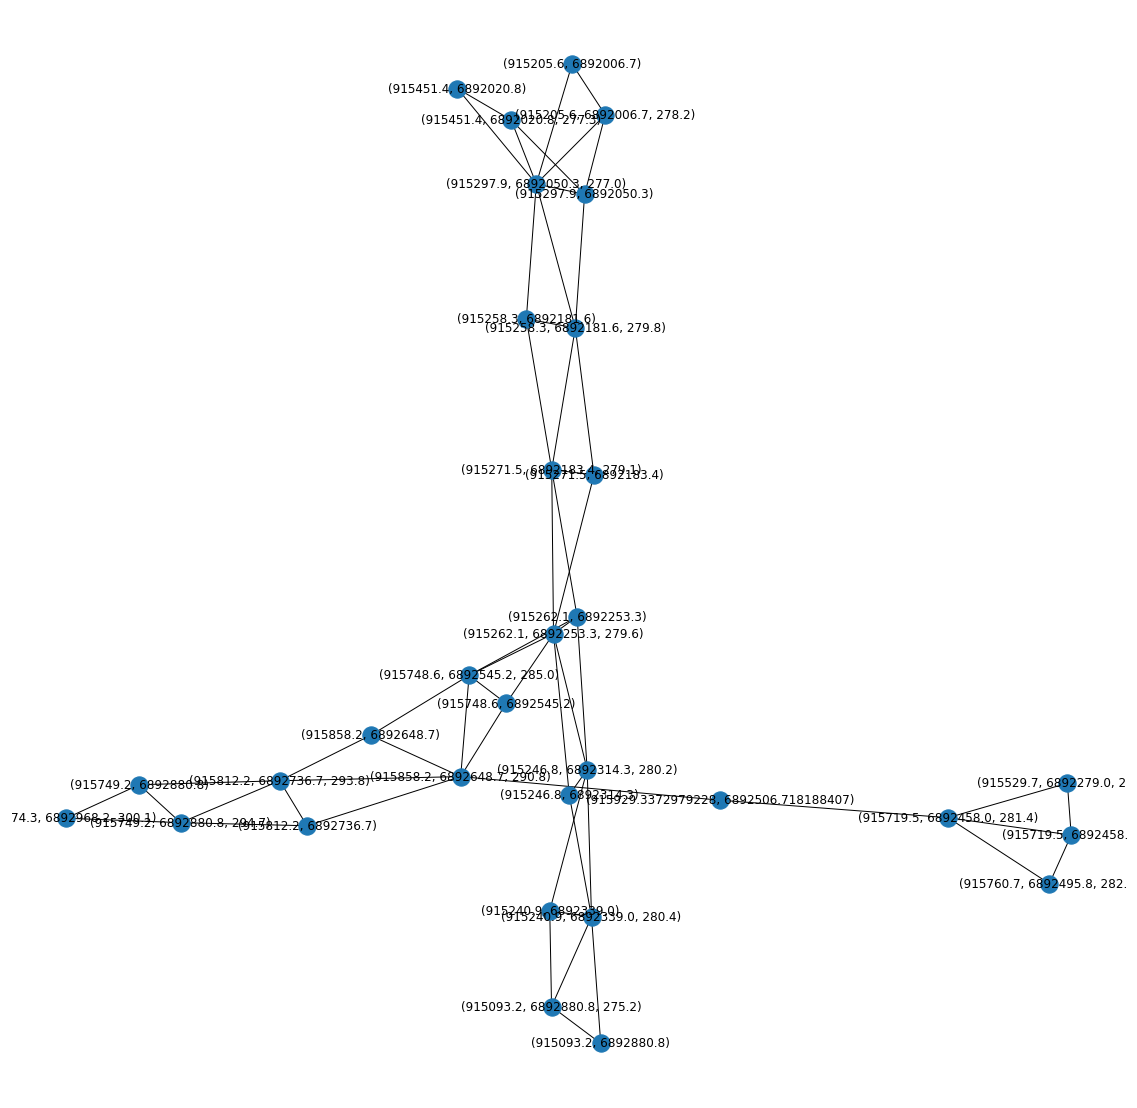

In [35]:
fig, ax = plt.subplots(figsize=(20.0, 20.0))
nx.draw(G, with_labels = True)
len(G)

In [22]:
nx.draw(M, with_labels = True)
len(M)

NameError: name 'M' is not defined

In [27]:
G.degree

DegreeView({(1034789.8, 6894471.6, 307.4): 5, (1034792.2, 6894478.1, 307.4): 5, (1034787.6, 6894446.3, 308.1): 5, (1034780.3, 6894579.7, 311.6): 3, (1034775.0, 6894585.6, 311.8): 4, (1034920.3, 6894190.3, 329.9): 3, (1034800.6, 6894503.8, 308.6): 3, (1034408.5, 6894467.7, 286.3): 5, (1034436.5, 6894406.1, 261.7): 3, (1034369.5, 6894549.9, 328.6): 5, (1034898.1, 6894621.1, -99.0): 3, (1034803.5, 6894571.7, -99.0): 7, (1034800.6, 6894503.8, -99.0): 3, (1034920.3, 6894190.3, -99.0): 3, (1034787.6, 6894446.3, -99.0): 3, (1034780.3, 6894579.7, -99.0): 3, (1034775.0, 6894585.6, -99.0): 3, (1034408.5, 6894467.7, -99.0): 3, (1034477.6, 6894148.7, -99.0): 3, (1034792.2, 6894478.1, -99.0): 3, (1034024.3, 6894465.8, 258.1): 3, (1034369.3, 6894150.5, 254.2): 3, (1034024.3, 6894465.8): 3, (1034787.6, 6894446.3): 5, (1034792.2, 6894478.1): 5, (1034775.0, 6894585.6): 5, (1034408.5, 6894467.7): 5, (1034369.5, 6894549.9): 2, (1034898.1, 6894621.1): 3, (1034898.1, 6894621.1, 306.3): 1, (1034800.6, 68945

In [28]:
G.adjacency

<bound method Graph.adjacency of <networkx.classes.graph.Graph object at 0x000001939C68A358>>